In [648]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [649]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
import warnings 
warnings.filterwarnings("ignore")
data=pd.read_csv("AdClickData.csv")
data

,DailyTimeSpentonSite,Age,AreaIncome,DailyInternetUsage,AdTopicLine,City,Male,Country,Timestamp,ClickedonAd
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0.0,Tunisia,3/27/2016 0:53,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1.0,Nauru,4/4/2016 1:39,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0.0,San Marino,3/13/2016 20:35,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1.0,Italy,1/10/2016 2:31,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0.0,Iceland,6/3/2016 3:36,0
...,...,...,...,...,...,...,...,...,...,...
995,72.97,30,71384.57,208.58,Fundamental modular algorithm,Duffystad,1.0,Lebanon,2/11/2016 21:49,1
996,51.30,45,67782.17,134.42,Grass-roots cohesive monitoring,New Darlene,1.0,Bosnia and Herzegovina,4/22/2016 2:07,1
997,NaN,51,42415.72,120.37,Expanded intangible solution,South Jessica,1.0,Mongolia,2/1/2016 17:24,1
998,55.55,19,41920.79,187.95,Proactive bandwidth-monitored policy,West Steven,0.0,Guatemala,3/24/2016 2:35,0


In [650]:
#Preprocessing
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   DailyTimeSpentonSite  987 non-null    float64
 1   Age                   1000 non-null   int64  
 2   AreaIncome            987 non-null    float64
 3   DailyInternetUsage    989 non-null    float64
 4   AdTopicLine           1000 non-null   object 
 5   City                  999 non-null    object 
 6   Male                  997 non-null    float64
 7   Country               991 non-null    object 
 8   Timestamp             1000 non-null   object 
 9   ClickedonAd           1000 non-null   int64  
dtypes: float64(4), int64(2), object(4)
memory usage: 78.3+ KB


In [651]:
data.describe()

,DailyTimeSpentonSite,Age,AreaIncome,DailyInternetUsage,Male,ClickedonAd
count,987.000000,1000.000000,987.000000,989.000000,997.000000,1000.00000
mean,64.929524,36.009000,54980.667234,179.863620,0.480441,0.50000
std,15.844699,8.785562,13439.998510,43.870142,0.499868,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.270000,29.000000,46947.570000,138.710000,0.000000,0.00000
50%,68.110000,35.000000,57009.760000,182.650000,0.000000,0.50000
75%,78.460000,42.000000,65479.350000,218.790000,1.000000,1.00000
max,91.430000,61.000000,79484.800000,267.010000,1.000000,1.00000


In [652]:
data.isnull().sum()

DailyTimeSpentonSite    13
Age                      0
AreaIncome              13
DailyInternetUsage      11
AdTopicLine              0
City                     1
Male                     3
Country                  9
Timestamp                0
ClickedonAd              0
dtype: int64

In [653]:
data["DailyTimeSpentonSite"]=pd.to_numeric(data["DailyTimeSpentonSite"])
data

,DailyTimeSpentonSite,Age,AreaIncome,DailyInternetUsage,AdTopicLine,City,Male,Country,Timestamp,ClickedonAd
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0.0,Tunisia,3/27/2016 0:53,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1.0,Nauru,4/4/2016 1:39,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0.0,San Marino,3/13/2016 20:35,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1.0,Italy,1/10/2016 2:31,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0.0,Iceland,6/3/2016 3:36,0
...,...,...,...,...,...,...,...,...,...,...
995,72.97,30,71384.57,208.58,Fundamental modular algorithm,Duffystad,1.0,Lebanon,2/11/2016 21:49,1
996,51.30,45,67782.17,134.42,Grass-roots cohesive monitoring,New Darlene,1.0,Bosnia and Herzegovina,4/22/2016 2:07,1
997,NaN,51,42415.72,120.37,Expanded intangible solution,South Jessica,1.0,Mongolia,2/1/2016 17:24,1
998,55.55,19,41920.79,187.95,Proactive bandwidth-monitored policy,West Steven,0.0,Guatemala,3/24/2016 2:35,0


In [654]:
data["DailyTimeSpentonSite"]=data["DailyTimeSpentonSite"].fillna(data["DailyTimeSpentonSite"].mean())
data

,DailyTimeSpentonSite,Age,AreaIncome,DailyInternetUsage,AdTopicLine,City,Male,Country,Timestamp,ClickedonAd
0,68.950000,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0.0,Tunisia,3/27/2016 0:53,0
1,80.230000,31,68441.85,193.77,Monitored national standardization,West Jodi,1.0,Nauru,4/4/2016 1:39,0
2,69.470000,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0.0,San Marino,3/13/2016 20:35,0
3,74.150000,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1.0,Italy,1/10/2016 2:31,0
4,68.370000,35,73889.99,225.58,Robust logistical utilization,South Manuel,0.0,Iceland,6/3/2016 3:36,0
...,...,...,...,...,...,...,...,...,...,...
995,72.970000,30,71384.57,208.58,Fundamental modular algorithm,Duffystad,1.0,Lebanon,2/11/2016 21:49,1
996,51.300000,45,67782.17,134.42,Grass-roots cohesive monitoring,New Darlene,1.0,Bosnia and Herzegovina,4/22/2016 2:07,1
997,64.929524,51,42415.72,120.37,Expanded intangible solution,South Jessica,1.0,Mongolia,2/1/2016 17:24,1
998,55.550000,19,41920.79,187.95,Proactive bandwidth-monitored policy,West Steven,0.0,Guatemala,3/24/2016 2:35,0


In [655]:
data["AreaIncome"]=data["AreaIncome"].fillna(data["AreaIncome"].median())
data

,DailyTimeSpentonSite,Age,AreaIncome,DailyInternetUsage,AdTopicLine,City,Male,Country,Timestamp,ClickedonAd
0,68.950000,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0.0,Tunisia,3/27/2016 0:53,0
1,80.230000,31,68441.85,193.77,Monitored national standardization,West Jodi,1.0,Nauru,4/4/2016 1:39,0
2,69.470000,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0.0,San Marino,3/13/2016 20:35,0
3,74.150000,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1.0,Italy,1/10/2016 2:31,0
4,68.370000,35,73889.99,225.58,Robust logistical utilization,South Manuel,0.0,Iceland,6/3/2016 3:36,0
...,...,...,...,...,...,...,...,...,...,...
995,72.970000,30,71384.57,208.58,Fundamental modular algorithm,Duffystad,1.0,Lebanon,2/11/2016 21:49,1
996,51.300000,45,67782.17,134.42,Grass-roots cohesive monitoring,New Darlene,1.0,Bosnia and Herzegovina,4/22/2016 2:07,1
997,64.929524,51,42415.72,120.37,Expanded intangible solution,South Jessica,1.0,Mongolia,2/1/2016 17:24,1
998,55.550000,19,41920.79,187.95,Proactive bandwidth-monitored policy,West Steven,0.0,Guatemala,3/24/2016 2:35,0


In [656]:
data["DailyInternetUsage"]=data["DailyInternetUsage"].fillna(250.05)
data

,DailyTimeSpentonSite,Age,AreaIncome,DailyInternetUsage,AdTopicLine,City,Male,Country,Timestamp,ClickedonAd
0,68.950000,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0.0,Tunisia,3/27/2016 0:53,0
1,80.230000,31,68441.85,193.77,Monitored national standardization,West Jodi,1.0,Nauru,4/4/2016 1:39,0
2,69.470000,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0.0,San Marino,3/13/2016 20:35,0
3,74.150000,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1.0,Italy,1/10/2016 2:31,0
4,68.370000,35,73889.99,225.58,Robust logistical utilization,South Manuel,0.0,Iceland,6/3/2016 3:36,0
...,...,...,...,...,...,...,...,...,...,...
995,72.970000,30,71384.57,208.58,Fundamental modular algorithm,Duffystad,1.0,Lebanon,2/11/2016 21:49,1
996,51.300000,45,67782.17,134.42,Grass-roots cohesive monitoring,New Darlene,1.0,Bosnia and Herzegovina,4/22/2016 2:07,1
997,64.929524,51,42415.72,120.37,Expanded intangible solution,South Jessica,1.0,Mongolia,2/1/2016 17:24,1
998,55.550000,19,41920.79,187.95,Proactive bandwidth-monitored policy,West Steven,0.0,Guatemala,3/24/2016 2:35,0


In [657]:
data.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Length: 1000, dtype: bool

In [658]:
print(data["Country"].value_counts().to_string())

Country
France                                                 9
Czech Republic                                         9
Afghanistan                                            8
Turkey                                                 8
Micronesia                                             8
Liberia                                                8
Senegal                                                8
Peru                                                   8
South Africa                                           8
Greece                                                 8
Cyprus                                                 8
Australia                                              8
Bahamas                                                7
Cambodia                                               7
Burundi                                                7
Eritrea                                                7
Western Sahara                                         7
Albania                

In [659]:
type(data["Timestamp"][1])

str

In [660]:
data["Timestamp"]=pd.to_datetime(data["Timestamp"])
type(data["Timestamp"][1])

pandas._libs.tslibs.timestamps.Timestamp

In [661]:
data.head()

,DailyTimeSpentonSite,Age,AreaIncome,DailyInternetUsage,AdTopicLine,City,Male,Country,Timestamp,ClickedonAd
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0.0,Tunisia,2016-03-27 00:53:00,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1.0,Nauru,2016-04-04 01:39:00,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0.0,San Marino,2016-03-13 20:35:00,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1.0,Italy,2016-01-10 02:31:00,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0.0,Iceland,2016-06-03 03:36:00,0


In [662]:
data=data.drop("Timestamp",axis=1)
data

,DailyTimeSpentonSite,Age,AreaIncome,DailyInternetUsage,AdTopicLine,City,Male,Country,ClickedonAd
0,68.950000,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0.0,Tunisia,0
1,80.230000,31,68441.85,193.77,Monitored national standardization,West Jodi,1.0,Nauru,0
2,69.470000,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0.0,San Marino,0
3,74.150000,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1.0,Italy,0
4,68.370000,35,73889.99,225.58,Robust logistical utilization,South Manuel,0.0,Iceland,0
...,...,...,...,...,...,...,...,...,...
995,72.970000,30,71384.57,208.58,Fundamental modular algorithm,Duffystad,1.0,Lebanon,1
996,51.300000,45,67782.17,134.42,Grass-roots cohesive monitoring,New Darlene,1.0,Bosnia and Herzegovina,1
997,64.929524,51,42415.72,120.37,Expanded intangible solution,South Jessica,1.0,Mongolia,1
998,55.550000,19,41920.79,187.95,Proactive bandwidth-monitored policy,West Steven,0.0,Guatemala,0


In [663]:
print("Oldest Person Clicked on Ad:",data["Age"].max())

Oldest Person Clicked on Ad: 61


In [664]:
print("Oldest Person Didn't Clicked on Ad:",data[data["ClickedonAd"]==0]["Age"].max())

Oldest Person Didn't Clicked on Ad: 53


In [665]:
print("Youngest Person Clicked on Ad:",data["Age"].min())

Youngest Person Clicked on Ad: 19


In [666]:
print("Youngest Person Didn't Clicked on Ad:",data[data["ClickedonAd"]==0]["Age"].min())

Youngest Person Didn't Clicked on Ad: 19


In [667]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data["Country"]=le.fit_transform(data["Country"])
data

,DailyTimeSpentonSite,Age,AreaIncome,DailyInternetUsage,AdTopicLine,City,Male,Country,ClickedonAd
0,68.950000,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0.0,215,0
1,80.230000,31,68441.85,193.77,Monitored national standardization,West Jodi,1.0,147,0
2,69.470000,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0.0,184,0
3,74.150000,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1.0,103,0
4,68.370000,35,73889.99,225.58,Robust logistical utilization,South Manuel,0.0,96,0
...,...,...,...,...,...,...,...,...,...
995,72.970000,30,71384.57,208.58,Fundamental modular algorithm,Duffystad,1.0,116,1
996,51.300000,45,67782.17,134.42,Grass-roots cohesive monitoring,New Darlene,1.0,26,1
997,64.929524,51,42415.72,120.37,Expanded intangible solution,South Jessica,1.0,140,1
998,55.550000,19,41920.79,187.95,Proactive bandwidth-monitored policy,West Steven,0.0,85,0


In [668]:
data["AdTopicLine"]=le.fit_transform(data["AdTopicLine"])
data 

,DailyTimeSpentonSite,Age,AreaIncome,DailyInternetUsage,AdTopicLine,City,Male,Country,ClickedonAd
0,68.950000,35,61833.90,256.09,91,Wrightburgh,0.0,215,0
1,80.230000,31,68441.85,193.77,464,West Jodi,1.0,147,0
2,69.470000,26,59785.94,236.50,566,Davidton,0.0,184,0
3,74.150000,29,54806.18,245.89,903,West Terrifurt,1.0,103,0
4,68.370000,35,73889.99,225.58,766,South Manuel,0.0,96,0
...,...,...,...,...,...,...,...,...,...
995,72.970000,30,71384.57,208.58,345,Duffystad,1.0,116,1
996,51.300000,45,67782.17,134.42,359,New Darlene,1.0,26,1
997,64.929524,51,42415.72,120.37,263,South Jessica,1.0,140,1
998,55.550000,19,41920.79,187.95,641,West Steven,0.0,85,0


<Axes: xlabel='ClickedonAd', ylabel='count'>

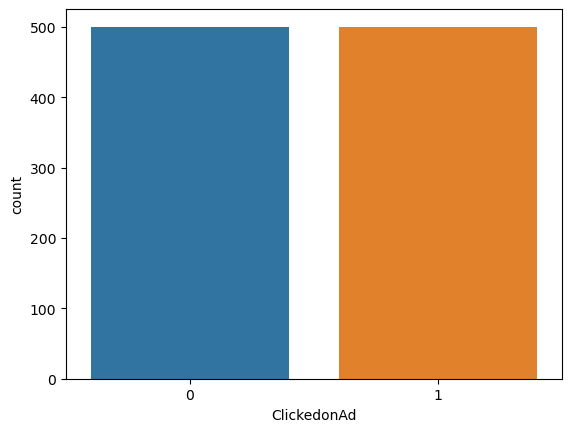

In [669]:
#Visualize
sns.countplot(x="ClickedonAd",data=data)

In [670]:
data["Male"].fillna(data["Male"].mode()[0],inplace=True)
data

,DailyTimeSpentonSite,Age,AreaIncome,DailyInternetUsage,AdTopicLine,City,Male,Country,ClickedonAd
0,68.950000,35,61833.90,256.09,91,Wrightburgh,0.0,215,0
1,80.230000,31,68441.85,193.77,464,West Jodi,1.0,147,0
2,69.470000,26,59785.94,236.50,566,Davidton,0.0,184,0
3,74.150000,29,54806.18,245.89,903,West Terrifurt,1.0,103,0
4,68.370000,35,73889.99,225.58,766,South Manuel,0.0,96,0
...,...,...,...,...,...,...,...,...,...
995,72.970000,30,71384.57,208.58,345,Duffystad,1.0,116,1
996,51.300000,45,67782.17,134.42,359,New Darlene,1.0,26,1
997,64.929524,51,42415.72,120.37,263,South Jessica,1.0,140,1
998,55.550000,19,41920.79,187.95,641,West Steven,0.0,85,0


In [671]:
data["Male"].isnull().sum()

0

In [672]:
x=data.drop(columns=["AdTopicLine","City","Country","ClickedonAd"], axis=1)
x

,DailyTimeSpentonSite,Age,AreaIncome,DailyInternetUsage,Male
0,68.950000,35,61833.90,256.09,0.0
1,80.230000,31,68441.85,193.77,1.0
2,69.470000,26,59785.94,236.50,0.0
3,74.150000,29,54806.18,245.89,1.0
4,68.370000,35,73889.99,225.58,0.0
...,...,...,...,...,...
995,72.970000,30,71384.57,208.58,1.0
996,51.300000,45,67782.17,134.42,1.0
997,64.929524,51,42415.72,120.37,1.0
998,55.550000,19,41920.79,187.95,0.0


In [673]:
x.isnull().sum()

DailyTimeSpentonSite    0
Age                     0
AreaIncome              0
DailyInternetUsage      0
Male                    0
dtype: int64

In [674]:
x.Male.value_counts()

Male
0.0    521
1.0    479
Name: count, dtype: int64

In [675]:
#Target
y=data[["ClickedonAd"]]
y

,ClickedonAd
0,0
1,0
2,0
3,0
4,0
...,...
995,1
996,1
997,1
998,0


In [676]:
data

,DailyTimeSpentonSite,Age,AreaIncome,DailyInternetUsage,AdTopicLine,City,Male,Country,ClickedonAd
0,68.950000,35,61833.90,256.09,91,Wrightburgh,0.0,215,0
1,80.230000,31,68441.85,193.77,464,West Jodi,1.0,147,0
2,69.470000,26,59785.94,236.50,566,Davidton,0.0,184,0
3,74.150000,29,54806.18,245.89,903,West Terrifurt,1.0,103,0
4,68.370000,35,73889.99,225.58,766,South Manuel,0.0,96,0
...,...,...,...,...,...,...,...,...,...
995,72.970000,30,71384.57,208.58,345,Duffystad,1.0,116,1
996,51.300000,45,67782.17,134.42,359,New Darlene,1.0,26,1
997,64.929524,51,42415.72,120.37,263,South Jessica,1.0,140,1
998,55.550000,19,41920.79,187.95,641,West Steven,0.0,85,0


In [677]:
x.shape

(1000, 5)

In [678]:
y.shape

(1000, 1)

In [679]:
y

,ClickedonAd
0,0
1,0
2,0
3,0
4,0
...,...
995,1
996,1
997,1
998,0


In [680]:
data

,DailyTimeSpentonSite,Age,AreaIncome,DailyInternetUsage,AdTopicLine,City,Male,Country,ClickedonAd
0,68.950000,35,61833.90,256.09,91,Wrightburgh,0.0,215,0
1,80.230000,31,68441.85,193.77,464,West Jodi,1.0,147,0
2,69.470000,26,59785.94,236.50,566,Davidton,0.0,184,0
3,74.150000,29,54806.18,245.89,903,West Terrifurt,1.0,103,0
4,68.370000,35,73889.99,225.58,766,South Manuel,0.0,96,0
...,...,...,...,...,...,...,...,...,...
995,72.970000,30,71384.57,208.58,345,Duffystad,1.0,116,1
996,51.300000,45,67782.17,134.42,359,New Darlene,1.0,26,1
997,64.929524,51,42415.72,120.37,263,South Jessica,1.0,140,1
998,55.550000,19,41920.79,187.95,641,West Steven,0.0,85,0


In [681]:
#Split the dataset into train and test
x_train,x_test,y_train,y_test=train_test_split(x, y, test_size=0.3, random_state=0)
model=LogisticRegression()
model.fit(x_train, y_train)
y_pred=model.predict(x_test)
y_pred

array([0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1], d

In [682]:
data

,DailyTimeSpentonSite,Age,AreaIncome,DailyInternetUsage,AdTopicLine,City,Male,Country,ClickedonAd
0,68.950000,35,61833.90,256.09,91,Wrightburgh,0.0,215,0
1,80.230000,31,68441.85,193.77,464,West Jodi,1.0,147,0
2,69.470000,26,59785.94,236.50,566,Davidton,0.0,184,0
3,74.150000,29,54806.18,245.89,903,West Terrifurt,1.0,103,0
4,68.370000,35,73889.99,225.58,766,South Manuel,0.0,96,0
...,...,...,...,...,...,...,...,...,...
995,72.970000,30,71384.57,208.58,345,Duffystad,1.0,116,1
996,51.300000,45,67782.17,134.42,359,New Darlene,1.0,26,1
997,64.929524,51,42415.72,120.37,263,South Jessica,1.0,140,1
998,55.550000,19,41920.79,187.95,641,West Steven,0.0,85,0


In [683]:
#Training score
model.score(x_train,y_train)

0.8885714285714286

In [684]:
#Testing score
model.score(x_test,y_test)

0.91

In [685]:
print([y_test]," " ,[y_pred])


[     ClickedonAd
993            0
859            0
298            0
553            1
672            0
..           ...
167            0
998            0
984            0
491            1
10             1

[300 rows x 1 columns]]   [array([0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 

In [686]:
#pd.DataFrame({"Actual y value:":y_test,"Predicted y value:":y_pred})

In [687]:
print("Confusion Matrix: \n", confusion_matrix(y_test,y_pred))

Confusion Matrix: 
 [[155   9]
 [ 18 118]]


In [688]:
print("Accuracy:", accuracy_score(y_test,y_pred))

Accuracy: 0.91


In [689]:
print("Classification Report: \n", classification_report(y_test,y_pred))

Classification Report: 
               precision    recall  f1-score   support

           0       0.90      0.95      0.92       164
           1       0.93      0.87      0.90       136

    accuracy                           0.91       300
   macro avg       0.91      0.91      0.91       300
weighted avg       0.91      0.91      0.91       300



In [690]:
data

,DailyTimeSpentonSite,Age,AreaIncome,DailyInternetUsage,AdTopicLine,City,Male,Country,ClickedonAd
0,68.950000,35,61833.90,256.09,91,Wrightburgh,0.0,215,0
1,80.230000,31,68441.85,193.77,464,West Jodi,1.0,147,0
2,69.470000,26,59785.94,236.50,566,Davidton,0.0,184,0
3,74.150000,29,54806.18,245.89,903,West Terrifurt,1.0,103,0
4,68.370000,35,73889.99,225.58,766,South Manuel,0.0,96,0
...,...,...,...,...,...,...,...,...,...
995,72.970000,30,71384.57,208.58,345,Duffystad,1.0,116,1
996,51.300000,45,67782.17,134.42,359,New Darlene,1.0,26,1
997,64.929524,51,42415.72,120.37,263,South Jessica,1.0,140,1
998,55.550000,19,41920.79,187.95,641,West Steven,0.0,85,0


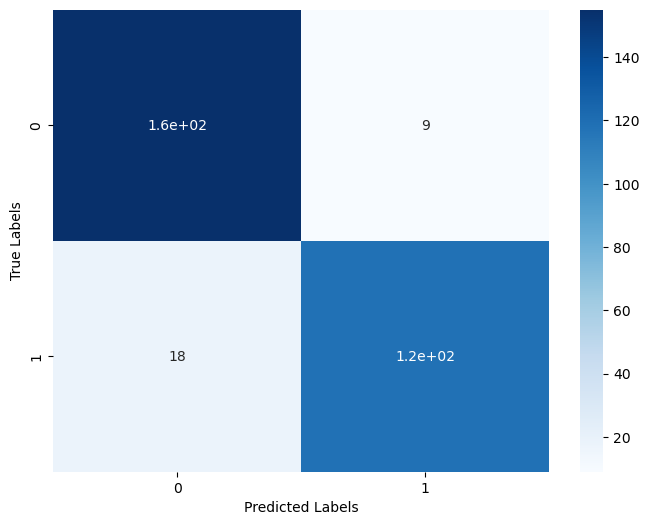

In [691]:
#Visualize the result
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,cmap='Blues')
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [692]:
data

,DailyTimeSpentonSite,Age,AreaIncome,DailyInternetUsage,AdTopicLine,City,Male,Country,ClickedonAd
0,68.950000,35,61833.90,256.09,91,Wrightburgh,0.0,215,0
1,80.230000,31,68441.85,193.77,464,West Jodi,1.0,147,0
2,69.470000,26,59785.94,236.50,566,Davidton,0.0,184,0
3,74.150000,29,54806.18,245.89,903,West Terrifurt,1.0,103,0
4,68.370000,35,73889.99,225.58,766,South Manuel,0.0,96,0
...,...,...,...,...,...,...,...,...,...
995,72.970000,30,71384.57,208.58,345,Duffystad,1.0,116,1
996,51.300000,45,67782.17,134.42,359,New Darlene,1.0,26,1
997,64.929524,51,42415.72,120.37,263,South Jessica,1.0,140,1
998,55.550000,19,41920.79,187.95,641,West Steven,0.0,85,0


###### data

In [697]:
#User input prediction
DailyTimeSpentonSite=float(input("Enter time spend on site:"))

Age=int(input("Enter the Age:"))
AreaIncome=float(input("Enter the Area Income:"))
DailyInternetUsage=float(input("Enter the Daily Internet Usage:"))
Male=float(input("Enter the Gender:"))
#Prediction
prediction=model.predict([[DailyTimeSpentonSite,Age,AreaIncome,DailyInternetUsage,Male]])
prediction

Enter time spend on site:564
Enter the Age:76
Enter the Area Income:56764
Enter the Daily Internet Usage:6536578
Enter the Gender:0.0


array([0], dtype=int64)

In [ ]:
y_pred

In [ ]:
data

In [ ]:
51.300000	45	67782.17	134.42	359	New Darlene	1.0	26